**Data Cleaning**

In [19]:
import nltk, re
import pandas as pd
from nltk.corpus import stopwords  

from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from IPython.display import clear_output 
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from bs4 import BeautifulSoup
from nltk.tokenize import WordPunctTokenizer

nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')  

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [0]:
df = pd.read_csv('data.csv')

In [0]:
tok = WordPunctTokenizer()
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))

negations_dic = {"isn't":"is not", 
                 "aren't":"are not", 
                 "wasn't":"was not", 
                 "weren't":"were not",
                "haven't":"have not",
                 "hasn't":"has not",
                 "hadn't":"had not",
                 "won't":"will not",
                "wouldn't":"would not", 
                 "don't":"do not", 
                 "doesn't":"does not",
                 "didn't":"did not",
                "can't":"can not",
                 "couldn't":"could not",
                 "shouldn't":"should not",
                 "mightn't":"might not",
                "mustn't":"must not",
                 "I've":"I have"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')

In [0]:
def tweet_cleaner_updated(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    try:
        bom_removed = souped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = souped

    stripped = re.sub(combined_pat, '', bom_removed)
    stripped = re.sub(pat2, '', stripped)
    lower_case = stripped.lower()
    neg_handled = neg_pattern.sub(lambda x: negations_dic[x.group()], lower_case)
    letters_only = re.sub("[^a-zA-Z]", " ", neg_handled)

    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # Tokenize and join together to remove unneccessary white spaces
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    return (" ".join(words)).strip()

In [23]:
clean_tweet = []

for i in range(0,len(df)):
    txt = tweet_cleaner_updated(df['Review'][i])
    df.set_value(i, 'Review_cleaned', txt)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  """


In [24]:
df

,Unnamed: 0,Review,Review_cleaned
0,0,Been obsessed with the #Frozen2 soundtrack sin...,been obsessed with the frozen soundtrack since...
1,1,Loved the story for #Frozen2 but felt the same...,loved the story for frozen but felt the same c...
2,2,oh gawd i'm such a softie for elsa. cutie babe...,oh gawd such softie for elsa cutie babey love ...
3,3,#Frozen2 death Disney on Ice; the cold hard fa...,frozen death disney on ice the cold hard facts...
4,4,"Disney's Frozen ""Let It Go"" Sequence Performed...",disney frozen let it go sequence performed by ...
...,...,...,...
8688,8688,I've come to the conclusion I'm Bruni (did I s...,ve come to the conclusion bruni did spell it r...
8689,8689,Although the plot to #Frozen2 may not be the a...,although the plot to frozen may not be the abs...
8690,8690,I'm so in love with the songs from #Frozen2 I'...,so in love with the songs from frozen ve been ...
8691,8691,Shoutout to @Lyrikris10 for prompting an entir...,shoutout to for prompting an entire generation...


In [0]:
df =df.drop(['Unnamed: 0', 'Review'], axis=1)

In [26]:
df

,Review_cleaned
0,been obsessed with the frozen soundtrack since...
1,loved the story for frozen but felt the same c...
2,oh gawd such softie for elsa cutie babey love ...
3,frozen death disney on ice the cold hard facts...
4,disney frozen let it go sequence performed by ...
...,...
8688,ve come to the conclusion bruni did spell it r...
8689,although the plot to frozen may not be the abs...
8690,so in love with the songs from frozen ve been ...
8691,shoutout to for prompting an entire generation...


**Sentiment Analysis**

In [0]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

In [28]:
text = df['Review_cleaned']

positive_tweet = []
negative_tweet = []
neutral_tweet = []

for i in range(0,len(text)):
    textB = TextBlob(text[i])
    sentiment = textB.sentiment.polarity
    df.set_value(i, 'Label',sentiment)

    if sentiment <0.00:
        SentimentClass = 'Negative'
        df.set_value(i, 'Tag', SentimentClass )
        negative_tweet.append(i)

    elif sentiment >0.00:
        SentimentClass = 'Positive'
        df.set_value(i, 'Tag', SentimentClass )
        positive_tweet.append(i)

    else:
        SentimentClass = 'Neutral'
        df.set_value(i, 'Tag', SentimentClass )
        neutral_tweet.append(i)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


In [29]:
# percentage of positive tweets
positive = 100*len(positive_tweet)/len(df)
print("Positive tweets percentage: {} %".format(positive))
    
# percentage of negative tweets
negative = 100*len(negative_tweet)/len(df)
print("Negative tweets percentage: {} %".format(negative))
    
# percentage of neutral tweets
neutral = 100*len(neutral_tweet)/len(df)
print("Neutral tweets percentage: {} %".format(neutral))

Positive tweets percentage: 49.94823421143449 %
Negative tweets percentage: 12.032669964339123 %
Neutral tweets percentage: 38.01909582422639 %


In [0]:
clean_df = df.to_csv('clean_data.csv')

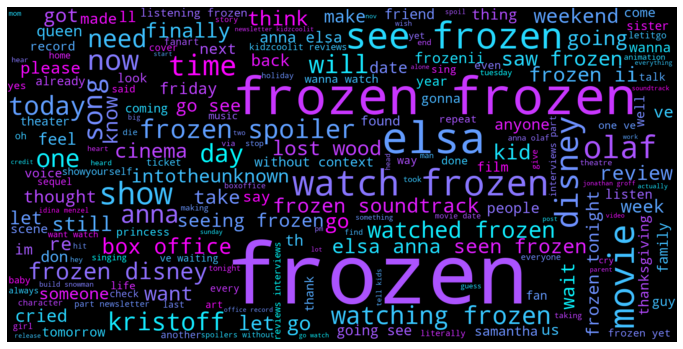

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

neu_tweets = df[df.Tag == 'Neutral']
neu_string = []

for t in neu_tweets.Review_cleaned:
    neu_string.append(t)
neu_string = pd.Series(neu_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='cool').generate(neu_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

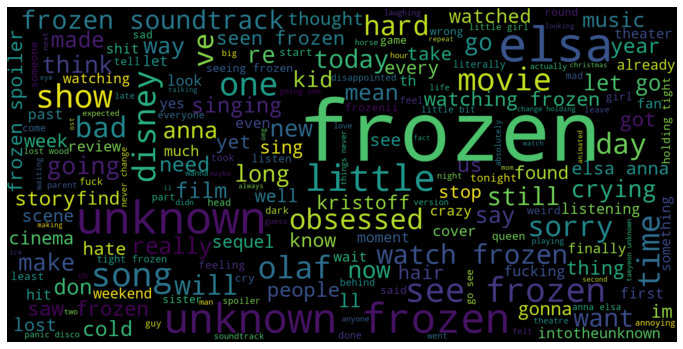

In [32]:
neg_tweets = df[df.Tag == 'Negative']
neg_string = []

for t in neg_tweets.Review_cleaned:
    neg_string.append(t)
neg_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200).generate(neg_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

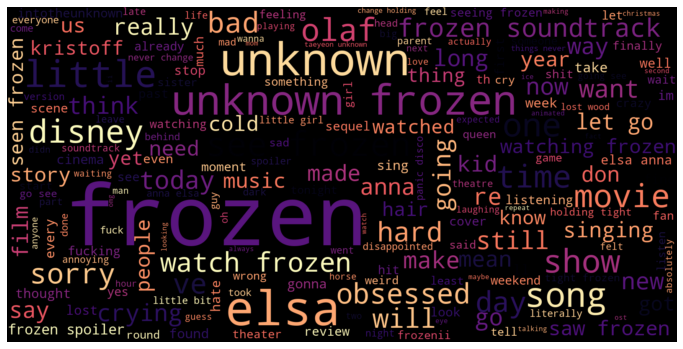

In [33]:
pos_tweets = df[df.Tag == 'Positive']
pos_string = []

for t in neg_tweets.Review_cleaned:
    pos_string.append(t)
pos_string = pd.Series(neg_string).str.cat(sep=' ')

wordcloud = WordCloud(width=1600, height=800,max_font_size=200,colormap='magma').generate(pos_string)
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

**Text preprocessing**

1.   Remove blank rows if any
2.   Change all the text to lower case

In [0]:
# Step - a : Remove blank rows if any.
df['Review_cleaned'].dropna(inplace=True)

# Step - b : Tokenization : In this each entry in the corpus will be broken into set of words
df['Review_cleaned']= [word_tokenize(entry) for entry in df['Review_cleaned']]

3.   Tokenization to break the corpus into set of words
2.   Remove stop words and perform Lemmatization

In [0]:
# WordNetLemmatizer requires Pos tags to understand if the word is noun or verb or adjective etc. By default it is set to Noun
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV

for index,lower in enumerate(df['Review_cleaned']):
    # Declaring Empty List to store the words that follow the rules for this step
    Final_words = []

    # Initializing WordNetLemmatizer()
    word_Lemmatized = WordNetLemmatizer()

    # pos_tag function below will provide the 'tag' i.e if the word is Noun(N) or Verb(V) or something else.
    for word, tag in pos_tag(lower):

        # Below condition is to check for Stop words and consider only alphabets
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)

    # The final processed set of words for each iteration will be stored in 'text_final'
    df.loc[index,'text_final'] = str(Final_words)

In [36]:
df.head(4)

,Review_cleaned,Label,Tag,text_final
0,"[been, obsessed, with, the, frozen, soundtrack...",-0.500000,Negative,"['obsess', 'frozen', 'soundtrack', 'since', 's..."
1,"[loved, the, story, for, frozen, but, felt, th...",0.237500,Positive,"['love', 'story', 'frozen', 'felt', 'charm', '..."
2,"[oh, gawd, such, softie, for, elsa, cutie, bab...",0.250000,Positive,"['oh', 'gawd', 'softie', 'elsa', 'cutie', 'bab..."
3,"[frozen, death, disney, on, ice, the, cold, ha...",-0.445833,Negative,"['frozen', 'death', 'disney', 'ice', 'cold', '..."


In [0]:
df.to_csv('clean_data.csv')